Here we use another library for the random forest: h2o

In [15]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [16]:
%%capture
h2o.init()

In [17]:
df = h2o.import_file('Data/mushrooms.csv', header=1)
df = df.drop(['veil-type', 'stalk-root', 'odor'])
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


class,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
e,x,s,y,t,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
e,b,s,w,t,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m
p,x,y,w,t,f,c,n,n,e,s,s,w,w,w,o,p,k,s,u
e,x,s,g,f,f,w,b,k,t,s,s,w,w,w,o,e,n,a,g
e,x,y,y,t,f,c,b,n,e,s,s,w,w,w,o,p,k,n,g
e,b,s,w,t,f,c,b,g,e,s,s,w,w,w,o,p,k,n,m
e,b,y,w,t,f,c,b,n,e,s,s,w,w,w,o,p,n,s,m
p,x,y,w,t,f,c,n,p,e,s,s,w,w,w,o,p,k,v,g
e,b,s,y,t,f,c,b,g,e,s,s,w,w,w,o,p,k,s,m


In [18]:
for col in df.columns:
    df[col] = df[col].asfactor()

response_column = 'class'
features = df.columns[1:]

In [19]:
random_state = 35
nfold = 5
hyperparams = {
    'ntrees': [50, 100, 200],
    'max_depth': [0, 5, 10, 20, 30]
}

In [20]:
train, test = df.split_frame(ratios=[0.8], seed=random_state)

In [21]:
# define the random forest model
rf = H2ORandomForestEstimator(nfolds=nfold, keep_cross_validation_predictions=True)

In [22]:
# perform grid search
grid = H2OGridSearch(model=rf, hyper_params=hyperparams)
grid.train(x=features, y=response_column, training_frame=train)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,model_ids,logloss
,30.0,100.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_10,0.0051536
,30.0,200.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_15,0.0054867
,20.0,200.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_14,0.0057986
,20.0,100.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_9,0.0059185
,2147483647.0000000,200.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_11,0.0064164
,2147483647.0000000,100.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_6,0.0067660
,2147483647.0000000,50.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_1,0.0068259
,30.0,50.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_5,0.0071432
,20.0,50.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_4,0.0080153
,10.0,100.0,Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_8,0.0087109


In [23]:
# accuracy data for all models
grid_results = grid.get_grid(sort_by='accuracy', decreasing=True)
print(grid_results)

Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    ntrees    model_ids                                                      accuracy
--  -----------  --------  -------------------------------------------------------------  ----------
    2.14748e+09  50        Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_1   1
    30           100       Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_10  1
    2.14748e+09  200       Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_11  1
    5            200       Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_12  1
    10           200       Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_13  1
    20           200       Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_14  1
    30           200       Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_15  1
    5            50        Grid_DRF_py_47_sid_bf77_model_python_1703526931578_1_model_2   1
 

In [24]:
# select the best model from the grid search
best_model = h2o.get_model(grid_results.sorted_metric_table()['model_ids'][0])
best_model.summary()

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,20599.0,6.0,16.0,10.32,15.0,43.0,28.06


In [25]:
# metrics for each fold
best_model.cross_validation_metrics_summary()

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,1.0,0.0,1.0,1.0,1.0,1.0,1.0
auc,1.0,0.0,1.0,1.0,1.0,1.0,1.0
err,0.0,0.0,0.0,0.0,0.0,0.0,0.0
err_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f0point5,1.0,0.0,1.0,1.0,1.0,1.0,1.0
f1,1.0,0.0,1.0,1.0,1.0,1.0,1.0
f2,1.0,0.0,1.0,1.0,1.0,1.0,1.0
lift_top_group,2.077506,0.0396862,2.0962732,2.130363,2.0836012,2.0316956,2.0455976
logloss,0.0068195,0.0006959,0.0075523,0.0063585,0.0075690,0.0065371,0.0060805
max_per_class_error,0.0,0.0,0.0,0.0,0.0,0.0,0.0


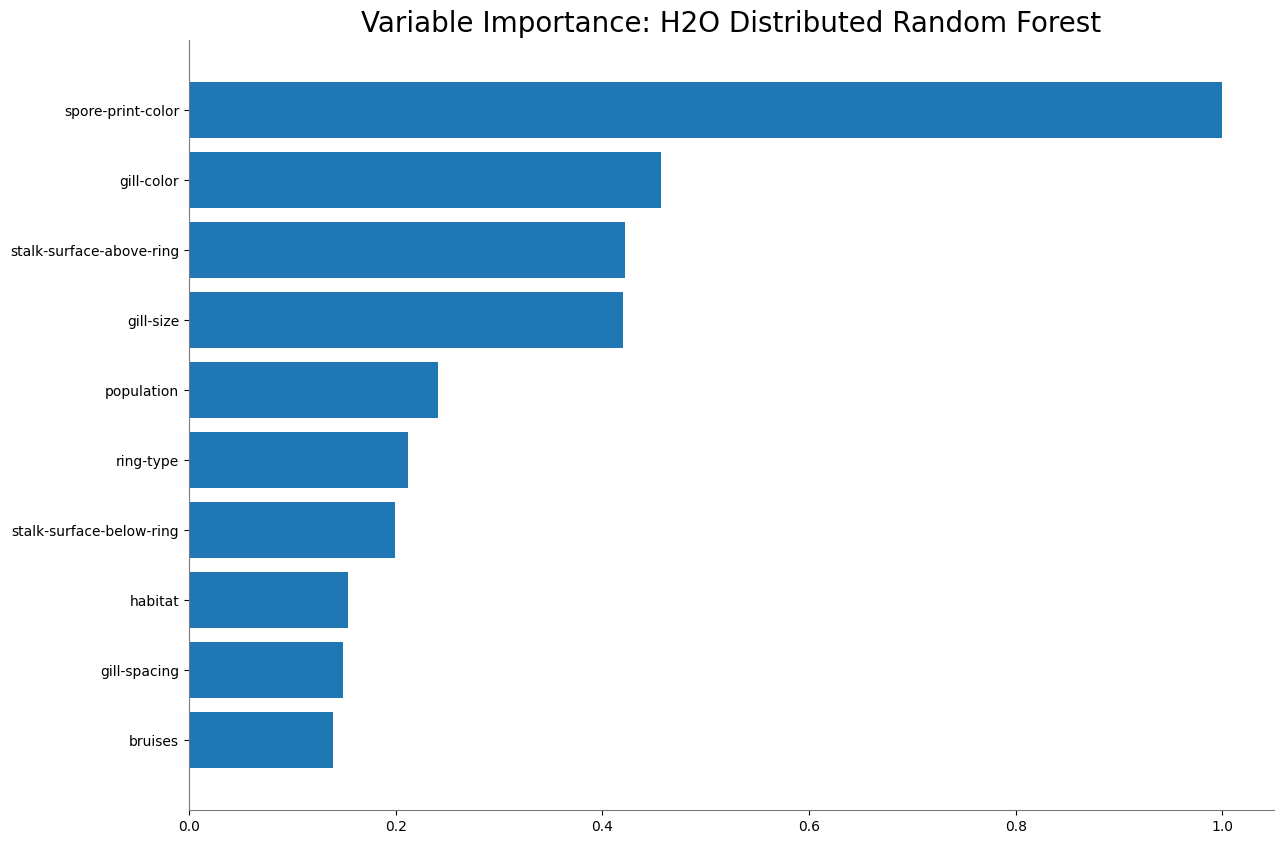

<Figure size 640x480 with 0 Axes>

In [26]:
# show the most important variables
best_model.varimp_plot()

In [27]:
# model performance on the test set
test_performance = best_model.model_performance(test_data=test)
print(test_performance.confusion_matrix())

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.889029446542263
       e    p    Error    Rate
-----  ---  ---  -------  ------------
e      827  0    0        (0.0/827.0)
p      0    777  0        (0.0/777.0)
Total  827  777  0        (0.0/1604.0)


In [28]:
%%capture
h2o.cluster().shutdown()